<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Pietruszkiewicz/Klasyfikacja_Binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [67]:
data = load_breast_cancer()

In [68]:
y = data.target #list(data.target_names)
X = data.data #data.feature_names

In [69]:
# Wszystkie przypadki
total_cases = len(y)
print(f"Total cases: {total_cases}")

# Przypadki raka złośliwego
malignant_cases = np.sum(y == 0)
print(f"Malignant cases: {malignant_cases}")

Total cases: 569
Malignant cases: 212


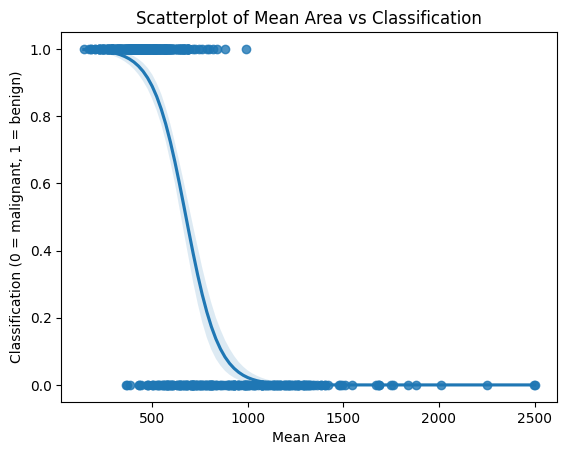

In [70]:
# Rozrzut średniego obszaru od klasyfikacji
sns.regplot(x=mean_area, y=y, logistic=True)
plt.title("Scatterplot of Mean Area vs Classification")
plt.xlabel("Mean Area")
plt.ylabel("Classification (0 = malignant, 1 = benign)")
plt.show()

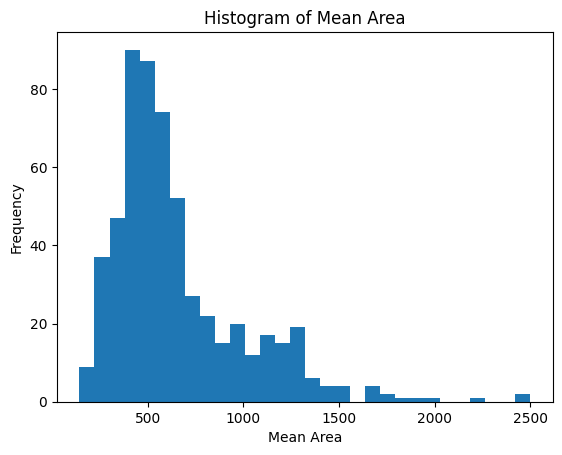

In [71]:
# Histogram średniego obszaru
mean_area = X[:, 3]
plt.hist(mean_area, bins=30)
plt.title("Histogram of Mean Area")
plt.xlabel("Mean Area")
plt.ylabel("Frequency")
plt.show()

In [72]:
# Czy dane są ustandaryzowane
if np.mean(X) != 0 or np.std(X) != 1:
    # Ustandaryzuj dane, jeśli nie są
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

In [73]:
# Zbiór danych testowy i uczący
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
# Regresja logistyczna
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.predict_proba(X_test)[0:4])
print(model.predict(X_test)[0:4])

[[1.20746882e-01 8.79253118e-01]
 [9.99985179e-01 1.48207036e-05]
 [9.96533638e-01 3.46636190e-03]
 [5.62408996e-04 9.99437591e-01]]
[1 0 0 1]


In [75]:
# Wyniki dla zbioru testowego
y_pred = model.predict(X_test)

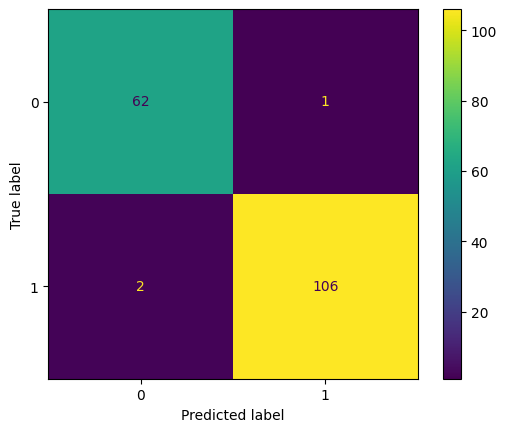

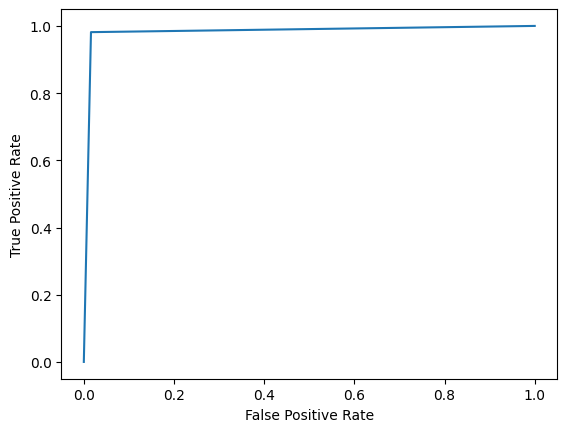

In [76]:
# Wizualizacja
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_disp.plot()

plt.show()

In [77]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prawdopodobieństwo klas dla zbioru testowego
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

# FPR i TPR
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)

# AUC
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

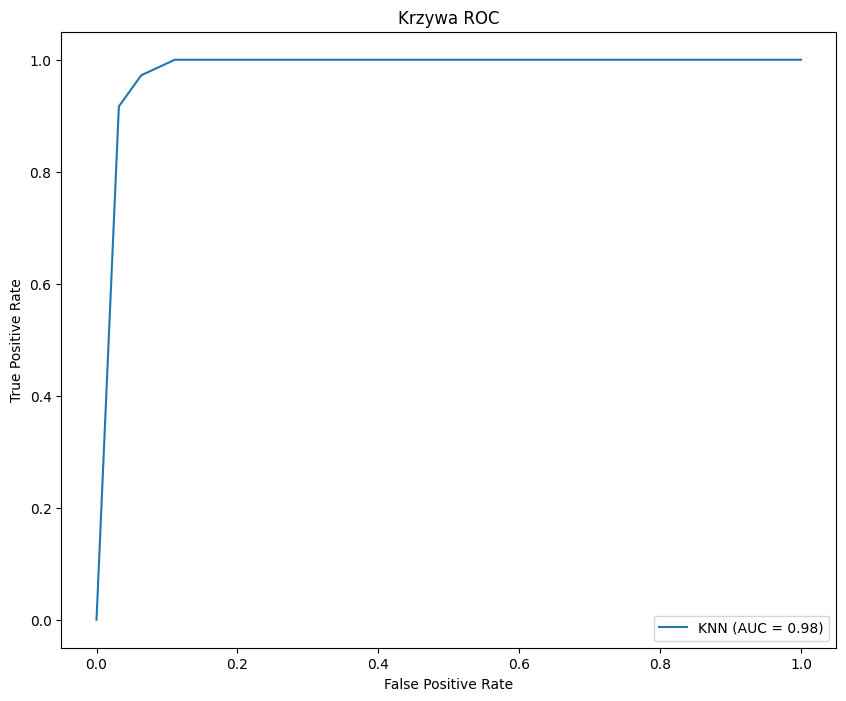

In [79]:
# ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.title("Krzywa ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()